In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm
from sklearn import cluster

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
fair_df = sm.datasets.fair.load_pandas().data

# Without Labels – Clustering

In [4]:
X = fair_df

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Fit the Model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

CPU times: user 301 ms, sys: 16.7 ms, total: 318 ms
Wall time: 326 ms


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.952618,41.114713,23.000000,3.287406,2.649626,13.811721,3.513716,4.054863,0.368890
1,4.259084,21.675355,2.619537,0.352027,2.347551,13.823065,3.237493,3.462349,0.603278
2,4.033251,31.279557,14.688424,2.377463,2.487685,13.496305,3.375616,3.972906,0.537099
3,4.302703,27.425676,2.591216,0.310811,2.317568,15.709459,3.704054,4.009459,0.572790
4,3.384615,24.038462,2.923077,0.538462,1.788462,14.057692,3.192308,3.557692,18.219226
5,4.075145,32.635838,8.205202,1.460983,2.500000,15.823699,3.699422,4.231214,0.438713
6,3.936752,38.102564,15.663248,2.533333,2.615385,14.227350,3.499145,4.119658,0.430786
7,4.031858,26.973451,7.022124,1.249115,2.335398,14.176991,3.413274,3.921239,0.741364


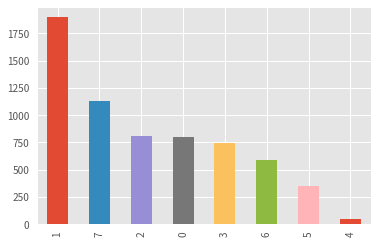

In [5]:
X = fair_df

m = cluster.KMeans()
print(m)
print()

%time m.fit(X)

display(
    X.describe(),
    pd.DataFrame(m.cluster_centers_, columns=X.columns)
)

(
    pd.Series(m.labels_)
    .groupby(m.labels_)
    .count()
    .sort_values(ascending=False)
    .plot.bar()
)

y_label = m.labels_

## Visualization

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from sklearn.decomposition import PCA

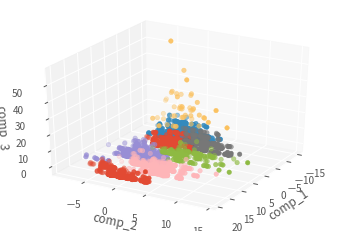

In [8]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
labels = list(range(y_label.min(), y_label.max()+1))

with plt.rc_context({'axes.facecolor': '#FFFFFF'}):

    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('comp_1')
    ax.set_ylabel('comp_2')
    ax.set_zlabel('comp_3')
    
    for i in labels:
        ax.scatter(
            X_pca[y_label == i, 0],
            X_pca[y_label == i, 1],
            X_pca[y_label == i, 2]
        )

    ax.view_init(30, 30)